In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 35kB/s 
     |████████████████████████████████| 4.3MB 4.3MB/s 
     |████████████████████████████████| 501kB 49.3MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123) #시드 123 고정
tf.random.set_seed(123)

x_data=np.array([[0,0],[0,1],[1,0],[1,1]] , dtype=np.float32)
y_data=np.array([[1,0],[0,1],[0,1],[1,0]] , dtype=np.float32)
#xor data

learning_rate = 0.01 #학습률

2.0.0-rc1


In [ ]:
#test dataset
pt = np.arange(0,1,0.01)
pt_x, pt_y = np.meshgrid(pt, pt)
pt_shape = pt_x.shape
pt_x = pt_x.flatten()
pt_y = pt_y.flatten()

In [ ]:
x_test = np.vstack((pt_x, pt_y)).T
y_test = np.zeros(shape=(x_test.shape[0], 2))

x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)

In [ ]:
fw = tf.keras.initializers.TruncatedNormal()
fb = tf.keras.initializers.Zeros()

#2-15-2
w1 = tf.Variable(fw(shape=(2,15)), dtype=tf.float32)
b1 = tf.Variable(fb(shape=(1,15)), dtype=tf.float32)
w2 = tf.Variable(fw(shape=(15,2)), dtype=tf.float32)
b2 = tf.Variable(fb(shape=(1,2)), dtype=tf.float32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
Loss = []
for epoch in range(500): #training
  with tf.GradientTape() as tape:
    z1 = tf.matmul(x_data, w1)+b1
    a1 = tf.sigmoid(z1)

    z2 = tf.matmul(a1, w2)+b2
    a2 = tf.sigmoid(z2)

    yhat = a2

    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_data, logits=z2)
    loss = tf.reduce_mean(loss)
    Loss.append(loss)

    grads = tape.gradient(loss, [w1,w2,b1,b2])
    optimizer.apply_gradients(grads_and_vars=zip(grads,[w1,w2,b1,b2]))
  correct = tf.equal(tf.argmax(y_data, axis=1), tf.argmax(yhat, axis=1))
  correct = tf.cast(correct, tf.float32)
  accuracy = tf.reduce_mean(correct)
  print(loss)

tf.Tensor(0.009328088, shape=(), dtype=float32)
tf.Tensor(0.009286374, shape=(), dtype=float32)
tf.Tensor(0.009244956, shape=(), dtype=float32)
tf.Tensor(0.009203836, shape=(), dtype=float32)
tf.Tensor(0.009163011, shape=(), dtype=float32)
tf.Tensor(0.009122479, shape=(), dtype=float32)
tf.Tensor(0.009082235, shape=(), dtype=float32)
tf.Tensor(0.009042278, shape=(), dtype=float32)
tf.Tensor(0.0090026, shape=(), dtype=float32)
tf.Tensor(0.008963205, shape=(), dtype=float32)
tf.Tensor(0.0089240875, shape=(), dtype=float32)
tf.Tensor(0.0088852495, shape=(), dtype=float32)
tf.Tensor(0.008846679, shape=(), dtype=float32)
tf.Tensor(0.008808382, shape=(), dtype=float32)
tf.Tensor(0.008770348, shape=(), dtype=float32)
tf.Tensor(0.008732578, shape=(), dtype=float32)
tf.Tensor(0.0086950725, shape=(), dtype=float32)
tf.Tensor(0.008657827, shape=(), dtype=float32)
tf.Tensor(0.008620834, shape=(), dtype=float32)
tf.Tensor(0.008584099, shape=(), dtype=float32)
tf.Tensor(0.008547617, shape=(), dtype=

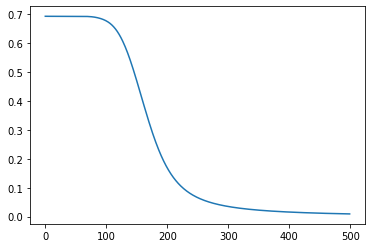

In [ ]:
plt.plot(Loss)
plt.show()
#loss 그래프

In [ ]:
z1 = tf.matmul(x_test, w1)+b1
a1 = tf.sigmoid(z1)

z2 = tf.matmul(a1, w2)+b2
a2 = tf.sigmoid(z2)

yhat = a2
#test

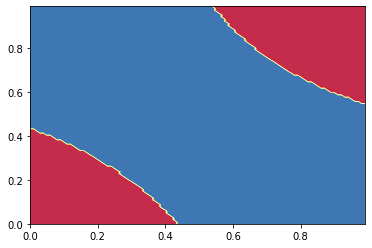

In [ ]:
#graph 생성
labels = np.argmax(yhat, axis=1).astype(np.int32)
pt_x = pt_x.reshape(pt_shape)
pt_y = pt_y.reshape(pt_shape)
labels = labels.reshape(pt_shape)
plt.contourf(pt_x, pt_y, labels, cmap=plt.cm.Spectral)
plt.show()